In [1]:
import nibabel as nib
import numpy as np
import os
from matplotlib import pyplot as plt

## Evaluation
We evaluate on sample 16.1

In [2]:
data_file = 'synthetic/16.1/data.nii.gz'
params_file = 'synthetic/16.1/params.nii.gz'

# the slice to visualise later on
sln = 9

In [3]:
# GROUND TRUTH
truth = nib.load(params_file).get_fdata()
truth = truth.transpose((-1,0,1,2))
TRUTH_D = truth[0]
TRUTH_f = truth[1]
TRUTH_Dp = truth[2]

# LSQFIT
LSQ_D = np.load('saved_preds/16.1/LSQfit/D.npy')
LSQ_f = np.load('saved_preds/16.1/LSQfit/f.npy')
LSQ_Dp = np.load('saved_preds/16.1/LSQfit/Dp.npy')

LSQ_D[LSQ_D<0] = 0
LSQ_f[LSQ_f<0] = 0
LSQ_Dp[LSQ_Dp<0] = 0

# IVIM-NET
IVIMnet_D = np.load('saved_preds/16/IVIMNET/D.npy')[0]
IVIMnet_f = np.load('saved_preds/16/IVIMNET/f.npy')[0]
IVIMnet_Dp = np.load('saved_preds/16/IVIMNET/Dp.npy')[0]

IVIMnet_D[IVIMnet_D<0] = 0
IVIMnet_f[IVIMnet_f<0] = 0
IVIMnet_Dp[IVIMnet_Dp<0] = 0

# 3dUNET
UNET_D = np.load('saved_preds/16/3DIVIMNET/D.npy')[0]
UNET_f = np.load('saved_preds/16/3DIVIMNET/f.npy')[0]
UNET_Dp = np.load('saved_preds/16/3DIVIMNET/Dp.npy')[0]

UNET_D[UNET_D<0] = 0
UNET_f[UNET_f<0] = 0
UNET_Dp[UNET_Dp<0] = 0

In [4]:
min_D = min(TRUTH_D.min(), LSQ_D.min(), IVIMnet_D.min(), UNET_D.min())
max_D = max(TRUTH_D.max(), LSQ_D.max(), IVIMnet_D.max(), UNET_D.max())
min_f = min(TRUTH_f.min(), LSQ_f.min(), IVIMnet_f.min(), UNET_f.min())
max_f = max(TRUTH_f.max(), LSQ_f.max(), IVIMnet_f.max(), UNET_f.max())
min_Dp = min(TRUTH_Dp.min(), LSQ_Dp.min(), IVIMnet_Dp.min(), UNET_Dp.min())
max_Dp = max(TRUTH_Dp.max(), LSQ_Dp.max(), IVIMnet_Dp.max(), UNET_Dp.max())

min_D, max_D, min_f, max_f, min_Dp, max_Dp

(0.0, 0.004999999999999999, 0.0, 0.8010824918746948, 0.0, 0.3034883886575699)

In [5]:
def RMSE(pred, y):
    mask = y>0
    n = mask.sum()
    return np.sqrt(((pred[mask] - y[mask])**2).sum() / n)

In [6]:
print('==D==')
print('IVIMnet', RMSE(IVIMnet_D, TRUTH_D))
print('LSQ', RMSE(LSQ_D, TRUTH_D))
print('UNET', RMSE(UNET_D, TRUTH_D))
print('==f==')
print('IVIMnet', RMSE(IVIMnet_f, TRUTH_f))
print('LSQ', RMSE(LSQ_f, TRUTH_f))
print('UNET',RMSE(UNET_f, TRUTH_f))
print('==Dp==')
print('IVIMnet', RMSE(IVIMnet_Dp, TRUTH_Dp))
print('LSQ', RMSE(LSQ_Dp, TRUTH_Dp))
print('UNET',RMSE(UNET_Dp, TRUTH_Dp))


==D==
IVIMnet 0.0005693916707914855
LSQ 0.0006355759050136908
UNET 0.0004942595415498935
==f==
IVIMnet 0.14038283436884472
LSQ 0.14759517586930693
UNET 0.12765807243703767
==Dp==
IVIMnet 0.09404348868420609
LSQ 0.10393016760426463
UNET 0.10099209398413087


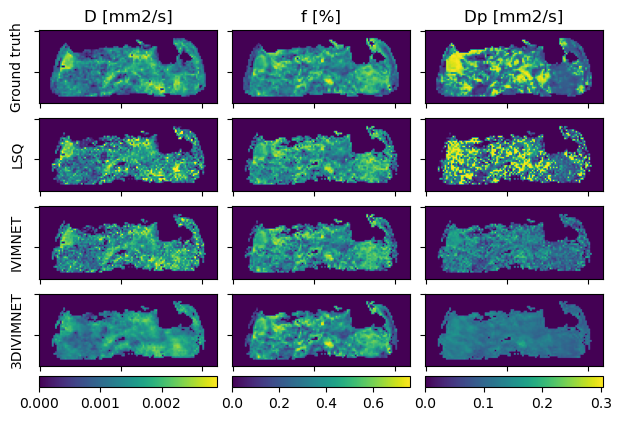

In [7]:
fig = plt.figure(figsize=(16,9))
from mpl_toolkits.axes_grid1 import AxesGrid

grid = AxesGrid(fig, 121,
    nrows_ncols=(4, 3),
    axes_pad=0.15,
    share_all=True,
    label_mode="keep",
    cbar_location="bottom",
    cbar_mode="edge",
    cbar_pad=0.1,
    cbar_size="15%",
    direction="column"
    )

a,b,c,d = (20,130, 50,95)
mask = (TRUTH_D[a:b,c:d,sln] + TRUTH_f[a:b,c:d,sln] + TRUTH_Dp[a:b,c:d,sln])>0

# Fix cbar limits for better visualisation?
# min_D = 0
# max_D = 0.005
# min_f = 0
# max_f = 0.7
# min_Dp = 0.005
# max_Dp = 0.3

# Try using the TRUTH for better visualisation
min_D = TRUTH_D.min()
max_D = TRUTH_D.max()
min_f = TRUTH_f.min()
max_f = TRUTH_f.max()
min_Dp = TRUTH_Dp.min()
max_Dp = TRUTH_Dp.max()

im0 = grid[0].imshow(np.rot90(TRUTH_D[a:b,c:d,sln]*mask), clim=(min_D, max_D))
im1 = grid[1].imshow(np.rot90(LSQ_D[a:b,c:d,sln]*mask), clim=(min_D, max_D))
im2 = grid[2].imshow(np.rot90(IVIMnet_D[a:b,c:d,sln]*mask), clim=(min_D, max_D))
im3 = grid[3].imshow(np.rot90(UNET_D[a:b,c:d,sln]*mask), clim=(min_D, max_D))

im0.axes.set_title('D [mm2/s]')
im0.axes.set_ylabel('Ground truth')
im1.axes.set_ylabel('LSQ')
im2.axes.set_ylabel('IVIMNET')
im3.axes.set_ylabel('3DIVIMNET')
grid.cbar_axes[0].colorbar(im3)

im4 = grid[4].imshow(np.rot90(TRUTH_f[a:b,c:d,sln]*mask), clim=(min_f, max_f))
im5 = grid[5].imshow(np.rot90(LSQ_f[a:b,c:d,sln]*mask), clim=(min_f, max_f))
im6 = grid[6].imshow(np.rot90(IVIMnet_f[a:b,c:d,sln]*mask), clim=(min_f, max_f))
im7 = grid[7].imshow(np.rot90(UNET_f[a:b,c:d,sln]*mask), clim=(min_f, max_f))

im4.axes.set_title('f [%]')
grid.cbar_axes[1].colorbar(im7)

im8 = grid[8].imshow(np.rot90(TRUTH_Dp[a:b,c:d,sln]*mask), clim=(min_Dp, max_Dp))
im9 = grid[9].imshow(np.rot90(LSQ_Dp[a:b,c:d,sln]*mask), clim=(min_Dp, max_Dp))
im10 = grid[10].imshow(np.rot90(IVIMnet_Dp[a:b,c:d,sln]*mask), clim=(min_Dp, max_Dp))
im11 = grid[11].imshow(np.rot90(UNET_Dp[a:b,c:d,sln]*mask), clim=(min_Dp, max_Dp))

im8.axes.set_title('Dp [mm2/s]')
grid.cbar_axes[2].colorbar(im11)


grid.axes_llc.set_xticklabels([])
grid.axes_llc.set_yticklabels([])

plt.show()

## Have a look at the paramenter distributions
Both IVIMNET and 3DIVIMENT seem to have some problem predicting Dp. Their losses go down but the parameter maps look worse than that of LSQ.
The distribution of Dp is non-Gaussian, which might suggest that more than one tissue (each with its own Dp) is being detected. A possible explanation for this is that, during the data synthesis, IVIMNET is overconstrained in its output (i.e., cons_max). However, widening its range of values results in IVIMNET puhing its predictions along the tail of the distribution indefinitely. This is still to be looked into, since the data synthesis might be the very source of this counterintuitive parameter maps.

In [8]:
param_files = []
for i in range(1,17):
    for j in range(1,3):
        path = 'synthetic/{}.{}/params.nii.gz'.format(i,j)
        if os.path.isfile(path):
            param_files.append(path)

In [9]:
params = []
for params_file in param_files:
    para = nib.load(params_file).get_fdata()
    para = para.reshape(-1, para.shape[-1])
    params.append(para)
params = np.concatenate(params)

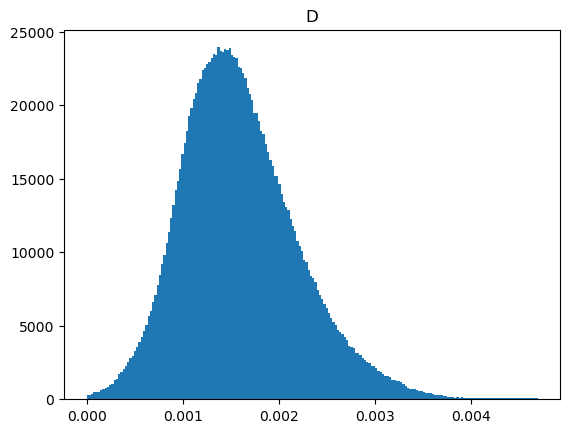

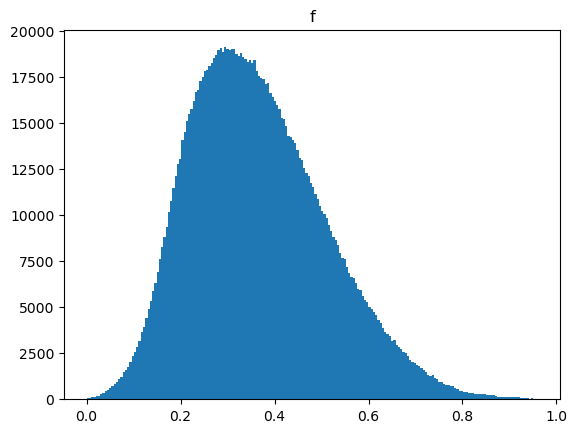

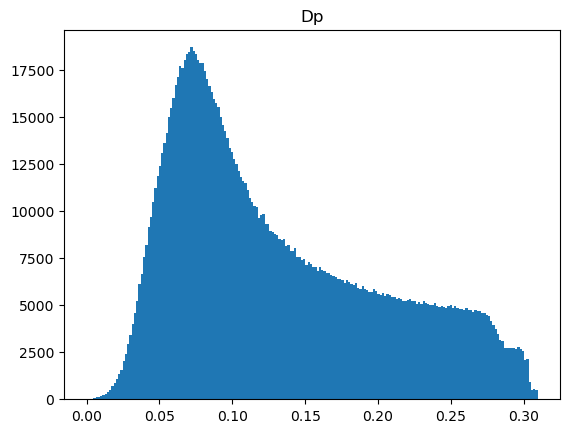

In [10]:
names = ['D', 'f', 'Dp']
for idx in range(3):
    mask_= params[:,idx] > 0
    plt.hist(params[:,idx][mask_], bins=200)
    plt.title(names[idx])
    plt.show()